# TP3 : Ensemble methods and feature selection

In this lab, we are going to explore the performances of different ensemble methods and feature selection methods, in different datasets. 

Objectives :

 - Investigate the performances of different ensemble methods
 - Investigate the influence of the hyperparameters of the models and of the data characteristics
 - Visualize the boundary decisions methods
 - Report correctly the results
 - Analyze and discuss results on an applicative dataset



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors
import numpy as np


# Part 1 : Ensemble methods on toy dataset 

## Subpart 1 : dataset generation

In this first part, you are going to evaluate the performances of ensemble methods.

First, by using the [make_classification](https://scikit-learn.org/1.5/modules/generated/sklearn.datasets.make_classification.html) function, generate a dataset of 100 points with 2 informative features. Also, by using the [train_test_split](https://scikit-learn.org/1.5/modules/generated/sklearn.model_selection.train_test_split.html) function, split your dataset in a training and a test set by putting 67% of data's in training and 33% of data's in test. 

You can use random_state = 123 in order to fix the randomness.

    Q1 : quickly explain why we separate the training set from the test set.

In [2]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
data,labels = make_classification(n_samples=100,n_informative=2)
X_train, X_test, y_train, y_test = train_test_split(data,labels,train_size=0.67,test_size=0.33,random_state=123)

Base : 20 features

In [3]:
print(X_train.shape)
print(X_test.shape)

(67, 20)
(33, 20)


## Subpart 2 : model evaluation

Now, apply different ensemble methods on this dataset. The ensemble methods you will evaluate are :
 - decision tree with max depth = 3
 - random forest with 3 estimators
 - adaboost classifier with 20 estimators
 - bagging classifier with 10 estimators. 

For each model, train in on the training dataset and evaluate it on the test dataset. Also, use the [DecisionBoundaryDisplay](https://scikit-learn.org/stable/modules/generated/sklearn.inspection.DecisionBoundaryDisplay.html) in order to plot the boundary decisions.

    Q2 : briefly explain each model , and the hyperparameters used.
    Q3 : Also, analyze and explain the differences between each boundary decision
    Q4 : Finally, report both training and test accuracy in a tabular and discuss them

**Decision trees :** Combines multiple decision trees, which work on a "if-then" rule system 
* Hyperparameter : max depth of the trees is the number of splits each tree can have.

[Text(0.5, 0.875, 'x[9] <= 0.187\ngini = 0.491\nsamples = 67\nvalue = [38.0, 29.0]'),
 Text(0.25, 0.625, 'x[19] <= -2.215\ngini = 0.054\nsamples = 36\nvalue = [35, 1]'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.375, 0.375, 'gini = 0.0\nsamples = 35\nvalue = [35, 0]'),
 Text(0.75, 0.625, 'x[5] <= -1.06\ngini = 0.175\nsamples = 31\nvalue = [3, 28]'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'x[18] <= 0.336\ngini = 0.5\nsamples = 6\nvalue = [3, 3]'),
 Text(0.5, 0.125, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.75, 0.125, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.875, 0.375, 'gini = 0.0\nsamples = 25\nvalue = [0, 25]')]

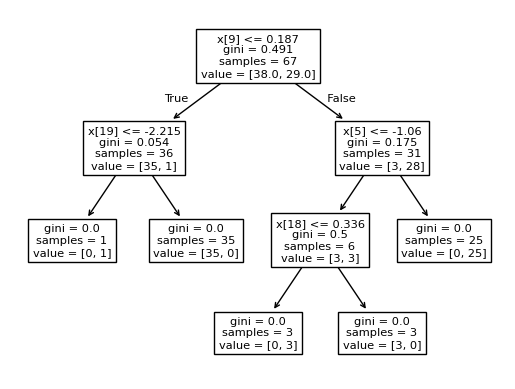

In [4]:
from sklearn import tree
from sklearn.inspection import DecisionBoundaryDisplay
dtc = tree.DecisionTreeClassifier()
dtc = dtc.fit(X_train,y_train)
tree.plot_tree(dtc)

In [5]:
prediction = dtc.predict(X_test)
err = 0
for i in range(len(X_test)) :
    if prediction[i]!=y_test[i]:
        err+=1
print("Decision tree accuracy =", 1-err/len(X_test))

Decision tree accuracy = 0.8484848484848485


In [6]:
X_train.shape

(67, 20)

In [ ]:
from sklearn.inspection import DecisionBoundaryDisplay
disp = DecisionBoundaryDisplay.from_estimator(
    dtc, X_train[:,0:2], response_method="predict",
    alpha=0.5,
)

**Random Forest :** Similar to decision trees, this method combines the predictions of the multiple decision trees 
* The estimator number hyperparameter is the number of trees used in the forest

In [10]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=3)
rf.fit(X_train,y_train)
prediction = rf.predict(X_test)
err = 0
for i in range(len(X_test)) :
    if prediction[i]!=y_test[i]:
        err+=1
print("Random forest accuracy =", 1-err/len(X_test))

Random forest accuracy = 0.8484848484848485


**Adaboost classifier :** Assigns random weights for classification, increasing the weight of missclassified units. During training the focus is to better classify outliers.
* The estimator number hyperparameter is the number of models used.

In [11]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier(n_estimators=20)
abc.fit(X_train,y_train)
prediction = abc.predict(X_test)
err = 0
for i in range(len(X_test)) :
    if prediction[i]!=y_test[i]:
        err+=1
print("AdaBoost accuracy =", 1-err/len(X_test))

AdaBoost accuracy = 0.8181818181818181


c:\Users\JERM\anaconda3\envs\torch3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


**Bagging Classifier :** The goal is to reduce the variance of a model by averaging the models. It increases the accuracy of unstable models.
* The estimator number hyperparameter is the number of models used.


In [ ]:
from sklearn.ensemble import BaggingClassifier
bc = BaggingClassifier(n_estimators=10)
bc.fit(X_train,y_train)
prediction = bc.predict(X_test)
err = 0
for i in range(len(X_test)) :
    if prediction[i]!=y_test[i]:
        err+=1
print("Bagging accuracy =", 1-err/len(X_test))

Bagging accuracy = 0.8787878787878788


## Subpart 3 : make blobs

Repeat previous exercises, by replacing the dataset with [make blobs](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html)  with 500 samples, two
classes (thus two centers) in the input parameters and random state = 123.

    Q5 : In which of the two datasets is the usage of ensembles more beneficiary, and why?
    Q6 : When might a single model yield better performance than an ensemble?


In [ ]:
from sklearn.datasets import make_blobs
data_blobs,labels_blobs = make_blobs(n_samples=500,n_features=2,random_state=123)


# Part 2 : Feature selection on toy dataset

In this second part, you are going to evaluate different feature selection methods. First, by using once again the [make classification](https://scikit-learn.org/1.5/modules/generated/sklearn.datasets.make_classification.html) function, compute a dataset with 100 samples, 10 features with 2 informative and 2 redundant. Split your dataset in training and test.

Then, apply different feature selection methods in order to find back which features are informatives. The methods you will aply are the following :
 - By using the feature importance reported by the different classifiers
 - Principal Component Analysis
 - Variance Threshold
 - Recursive Feature Elimination
 
For each feature selection method, use the 2 best selected features, and train a new model using only those features. The model you will use are the ones evaluated in the previous part.

    Q7 : For each feature selection method, briefly explain how they work
    Q8 : Report the results you obtain in a tabular. Analyze and discuss the results you obtain.



In [12]:
data_classification,labels_classification = make_classification(n_samples=100,n_features=10,n_informative=2,n_redundant=2)
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(data_classification,labels_classification,train_size=0.67,test_size=0.33,random_state=123)

In [13]:
print(X_train_class.shape)

(67, 10)


**principal component analysis (PCA)**
* The method is to find the principal component (points to the highest variance) and project other components on this component to reduce dimensionality

In [ ]:
from sklearn.decomposition import PCA
analyzer = PCA()
analyzer.fit(X_train_class)
print("feature variance ",analyzer.explained_variance_)
print("feature variance ratio",analyzer.explained_variance_ratio_)


feature variance  [4.47429282e+00 1.46924167e+00 1.35012794e+00 1.18066506e+00
 8.95655783e-01 7.85111298e-01 6.58644682e-01 5.28096651e-01
 4.95716418e-32 4.79870921e-33]
feature variance ratio [3.94494583e-01 1.29541785e-01 1.19039629e-01 1.04098232e-01
 7.89692066e-02 6.92225936e-02 5.80721399e-02 4.65618313e-02
 4.37068938e-33 4.23098098e-34]


Here we can get the variance ratios, they add up to 1 and we can see their relative weights. 

In [ ]:
reduced_train_data = X_train_class[:,0:2]
print(reduced_train_data.shape)
reduced_test_data = X_test_class[:,0:2]

(67, 2)


In [ ]:
bc = BaggingClassifier(n_estimators=10)
bc.fit(reduced_train_data,y_train_class)
prediction = bc.predict(reduced_test_data)
err = 0
for i in range(len(reduced_test_data)) :
    if prediction[i]!=y_test_class[i]:
        err+=1
print("Bagging accuracy =", 1-err/len(reduced_test_data))

Bagging accuracy = 0.6666666666666667


In [ ]:

abc = AdaBoostClassifier(n_estimators=20)
abc.fit(reduced_train_data,y_train_class)
prediction = abc.predict(reduced_test_data)
err = 0
for i in range(len(reduced_test_data)) :
    if prediction[i]!=y_test_class[i]:
        err+=1
print("AdaBoost accuracy =", 1-err/len(reduced_test_data))


AdaBoost accuracy = 0.7878787878787878
computation time / sample =  0.0012986126230723823


c:\Users\JERM\anaconda3\envs\torch3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [ ]:
rf = RandomForestClassifier(n_estimators=3)
rf.fit(reduced_train_data,y_train_class)
prediction = rf.predict(reduced_test_data)
err = 0
for i in range(len(reduced_test_data)) :
    if prediction[i]!=y_test_class[i]:
        err+=1
print("Random forest accuracy =", 1-err/len(reduced_test_data))

Random forest accuracy = 0.7272727272727273


In [ ]:
dtc = tree.DecisionTreeClassifier()
dtc = dtc.fit(reduced_train_data,y_train_class)
prediction = dtc.predict(reduced_test_data)
err = 0
for i in range(len(reduced_test_data)) :
    if prediction[i]!=y_test_class[i]:
        err+=1
print("decision tree accuracy =", 1-err/len(reduced_test_data))

decision tree accuracy = 0.7575757575757576


Using PCA, the best result is 0.79 using AdaBoost but the accuracy is lower than using the full dataset.

Variance threshold

In [ ]:
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold(threshold=1.45)
print(selector.fit_transform(X_train_class).shape)
reduced_train_data = selector.fit_transform(X_train_class)
reduced_test_data = selector.fit_transform(X_test_class)
print(reduced_test_data.shape)

(67, 2)
(33, 2)


Here by setting an appropriate threshold we can extract the 2 most significant features for the train set and the test set.


Now computing the classifiers accuracy

In [ ]:
bc = BaggingClassifier(n_estimators=10)
bc.fit(reduced_train_data,y_train_class)
prediction = bc.predict(reduced_test_data)
err = 0
for i in range(len(reduced_test_data)) :
    if prediction[i]!=y_test_class[i]:
        err+=1
print("Bagging accuracy =", 1-err/len(reduced_test_data))

Bagging accuracy = 0.5757575757575757


In [ ]:
abc = AdaBoostClassifier(n_estimators=20)
abc.fit(reduced_train_data,y_train_class)
prediction = abc.predict(reduced_test_data)
err = 0
for i in range(len(reduced_test_data)) :
    if prediction[i]!=y_test_class[i]:
        err+=1
print("AdaBoost accuracy =", 1-err/len(reduced_test_data))

AdaBoost accuracy = 0.4242424242424242


c:\Users\JERM\anaconda3\envs\torch3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [ ]:
rf = RandomForestClassifier(n_estimators=3)
rf.fit(reduced_train_data,y_train_class)
prediction = rf.predict(reduced_test_data)
err = 0
for i in range(len(reduced_test_data)) :
    if prediction[i]!=y_test_class[i]:
        err+=1
print("Random forest accuracy =", 1-err/len(reduced_test_data))

Random forest accuracy = 0.48484848484848486


In [ ]:
dtc = tree.DecisionTreeClassifier()
dtc = dtc.fit(reduced_train_data,y_train_class)
prediction = dtc.predict(reduced_test_data)
err = 0
for i in range(len(reduced_test_data)) :
    if prediction[i]!=y_test_class[i]:
        err+=1
print("decision tree accuracy =", 1-err/len(reduced_test_data))

decision tree accuracy = 0.6060606060606061


The result is somehow worse

**Recursive feature elimination (RFE)**
* The goal is to recursively remove the least significant features to reduce de dimensionality

In [ ]:
from sklearn.feature_selection import RFE
abc = AdaBoostClassifier(n_estimators=20)
abc.fit(X_train_class,y_train_class)
selector = RFE(estimator=abc,n_features_to_select=2,step=8)
reduced_train_data=selector.fit(X_test_class,y_test_class)
selector.ranking_

c:\Users\JERM\anaconda3\envs\torch3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\JERM\anaconda3\envs\torch3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\JERM\anaconda3\envs\torch3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


array([2, 1, 2, 1, 2, 2, 2, 2, 2, 2])

According to this classifier and RFE run, the features 2 and 4 are the most relevant.

In [22]:
reduced_train_data = X_train_class[:,[1,3]]
reduced_test_data = X_test_class[:,[1,3]]


In [ ]:
bc = BaggingClassifier(n_estimators=10)
bc.fit(reduced_train_data,y_train_class)
prediction = bc.predict(reduced_test_data)
err = 0
for i in range(len(reduced_test_data)) :
    if prediction[i]!=y_test_class[i]:
        err+=1
print("Bagging accuracy =", 1-err/len(reduced_test_data))

Bagging accuracy = 0.33333333333333337


In [ ]:
abc = AdaBoostClassifier(n_estimators=20)
abc.fit(reduced_train_data,y_train_class)
prediction = abc.predict(reduced_test_data)
err = 0
for i in range(len(reduced_test_data)) :
    if prediction[i]!=y_test_class[i]:
        err+=1
print("AdaBoost accuracy =", 1-err/len(reduced_test_data))

AdaBoost accuracy = 0.4545454545454546


c:\Users\JERM\anaconda3\envs\torch3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [ ]:
dtc = tree.DecisionTreeClassifier()
dtc = dtc.fit(reduced_train_data,y_train_class)
prediction = dtc.predict(reduced_test_data)
err = 0
for i in range(len(reduced_test_data)) :
    if prediction[i]!=y_test_class[i]:
        err+=1
print("decision tree accuracy =", 1-err/len(reduced_test_data))

decision tree accuracy = 0.4545454545454546


In [ ]:
rf = RandomForestClassifier(n_estimators=3)
rf.fit(reduced_train_data,y_train_class)
prediction = rf.predict(reduced_test_data)
err = 0
for i in range(len(reduced_test_data)) :
    if prediction[i]!=y_test_class[i]:
        err+=1
print("Random forest accuracy =", 1-err/len(reduced_test_data))

Random forest accuracy = 0.48484848484848486


# Part 3 application on a real dataset

You now have knowledge of different feature selection and ensemble methods. You are now going to apply them on a real dataset, another dataset extracted from Kaggle : [Student Alcohol Consumption](https://www.kaggle.com/datasets/uciml/student-alcohol-consumption/data).
 
First, read the given csv by using pandas and analyze the dataset.

    Q9 : Describe the task proposed in this dataset.
 
Then, apply the different ensemble methods and feature selection methods previously seen on this dataset. You may keep only the numerical values for simplicity, but you can extend it to non-numerical values if you have time.  
 
    Q10 : Report the results in a tabular and propose an in-depth analysis.

In [15]:
Student_df = pd.read_csv('student-mat.csv')
Student_df.columns.unique()

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

The goal is to determine the correlation between different factors to student alcohol consumption, which are the columns 27 : Workday alcohol consumption (1 -> 5) and column 28 : weekend alcohol consumption (1 -> 5).

We can first use feature selection to focus on the most important features of the dataset, using numerical values first. We will then use ensemble methods to try to determine each feature weight as accurately as possible.

In [16]:

str_columns = []
for columns in Student_df.columns :
    if type(Student_df[columns][0])==np.int64:
        str_columns.append(columns)
        print(False)

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False


In [ ]:
str_columns

In [18]:
numerical_student_df = Student_df[str_columns]


In [19]:
numerical_student_df.columns.unique()

Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2',
       'G3'],
      dtype='object')

In [29]:
Student_df_workday = Student_df["Dalc"]
Student_df_weekend = Student_df["Walc"]
numerical_student_df.drop(['Dalc','Walc'],axis=1)

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,health,absences,G1,G2,G3
0,18,4,4,2,2,0,4,3,4,3,6,5,6,6
1,17,1,1,1,2,0,5,3,3,3,4,5,5,6
2,15,1,1,1,2,3,4,3,2,3,10,7,8,10
3,15,4,2,1,3,0,3,2,2,5,2,15,14,15
4,16,3,3,1,2,0,4,3,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,20,2,2,1,2,2,5,5,4,4,11,9,9,9
391,17,3,1,2,1,0,2,4,5,2,3,14,16,16
392,21,1,1,1,1,3,5,5,3,3,3,10,8,7
393,18,3,2,3,1,0,4,4,1,5,0,11,12,10


Let's try to find a few important factors to student alchohol consumption, considering weekday and weekend separately.

First create train and test subsets


In [33]:
from pandas import DataFrame
train_split = numerical_student_df.sample(frac=0.8,random_state=42)
test_split = numerical_student_df.drop(train_split.index)
train_labels_weekday = Student_df_workday[train_split.index]
test_labels_weekday = Student_df_workday.drop(train_split.index)
train_labels_weekday = Student_df_weekend[train_split.index]
test_labels_weekend = Student_df_weekend.drop(train_split.index)

test_labels_weekday = DataFrame({'test_labels_workday': test_labels_weekday})
test_labels_weekend = DataFrame({'test_labels_workday': test_labels_weekend})

Train random forest 

In [35]:
rf = RandomForestClassifier(n_estimators=13)
rf.fit(train_split,train_labels_weekday)
prediction = rf.predict(test_labels_weekday)
err = 0
for i in range(len(test_labels_weekday)) :
    if prediction[i]!=test_labels_weekday[i]:
        err+=1
print("Random forest accuracy =", 1-err/len(test_labels_weekday))

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- test_labels_workday
Feature names seen at fit time, yet now missing:
- Dalc
- Fedu
- G1
- G2
- G3
- ...
